In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("../data/heart_attack/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
import torch
import torch.nn as nn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

print('Packages imported...')

Packages imported...


In [4]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()

# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,True,False,False,False,False,...,False,True,True,False,False,False,False,True,False,False
1,-1.333333,0.00,0.157480,1.046154,1.6875,True,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
2,-1.037037,0.00,-0.566929,0.584615,0.3750,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,0.074074,-0.50,-0.062992,0.769231,0.0000,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
4,0.148148,-0.50,1.795276,0.307692,-0.1250,False,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [6]:
X_train.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_2,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
132,-0.962963,-0.50,0.866142,0.276923,-0.500,True,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
202,0.222222,1.00,0.472441,-1.292308,0.000,True,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
196,-0.666667,1.00,-0.141732,-0.184615,1.750,True,False,False,False,False,...,True,False,False,True,False,True,False,False,True,False
75,0.000000,0.25,0.157480,0.246154,0.375,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
176,0.370370,-0.65,-0.157480,0.215385,0.375,True,True,False,True,False,...,False,False,True,True,False,False,True,False,False,True


In [9]:
from sdv.metadata import SingleTableMetadata

In [10]:
sdv_data = pd.concat([X_train,y_train],axis=1)

In [11]:
metadata = SingleTableMetadata()

metadata.detect_from_dataframe(sdv_data)

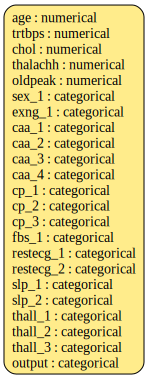

In [12]:
metadata.visualize()

In [13]:
from sdv.single_table import GaussianCopulaSynthesizer


In [14]:
synthesizer = GaussianCopulaSynthesizer(metadata, default_distribution='norm')


In [15]:
synthesizer.fit(sdv_data)

In [16]:
synthetic_data = synthesizer.sample(num_rows=242)

In [17]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=sdv_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 23/23 [00:00<00:00, 1152.35it/s]|
Column Shapes Score: 94.7%

(2/2) Evaluating Column Pair Trends: |██████████| 253/253 [00:02<00:00, 103.16it/s]|
Column Pair Trends Score: 60.0%

Overall Score (Average): 77.35%



In [18]:
quality_report.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

In [21]:
GC_data = pd.concat([sdv_data, synthetic_data])

GC_data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3,output
132,-0.962963,-0.50,0.866142,0.276923,-0.500,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,1
202,0.222222,1.00,0.472441,-1.292308,0.000,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0
196,-0.666667,1.00,-0.141732,-0.184615,1.750,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,0
75,0.000000,0.25,0.157480,0.246154,0.375,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,1
176,0.370370,-0.65,-0.157480,0.215385,0.375,True,True,False,True,False,...,False,True,True,False,False,True,False,False,True,0


In [22]:
from sdv.single_table import CTGANSynthesizer

In [23]:
CTGANsynth = CTGANSynthesizer(metadata, verbose = True)

In [24]:
CTGANsynth.fit(sdv_data)

Gen. (-0.32) | Discrim. (0.16): 100%|██████████| 300/300 [00:42<00:00,  7.11it/s] 


In [25]:
CTGan_synth_data = CTGANsynth.sample(num_rows=242)

In [26]:
quality_report_CTG = evaluate_quality(
    real_data=sdv_data,
    synthetic_data=CTGan_synth_data,
    metadata=metadata)
quality_report_CTG.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 23/23 [00:00<00:00, 1443.87it/s]|
Column Shapes Score: 91.09%

(2/2) Evaluating Column Pair Trends: |██████████| 253/253 [00:03<00:00, 80.87it/s]| 
Column Pair Trends Score: 58.48%

Overall Score (Average): 74.78%



In [27]:
CT_data = pd.concat([sdv_data, CTGan_synth_data])

CT_data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3,output
132,-0.962963,-0.50,0.866142,0.276923,-0.500,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,1
202,0.222222,1.00,0.472441,-1.292308,0.000,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0
196,-0.666667,1.00,-0.141732,-0.184615,1.750,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,0
75,0.000000,0.25,0.157480,0.246154,0.375,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,1
176,0.370370,-0.65,-0.157480,0.215385,0.375,True,True,False,True,False,...,False,True,True,False,False,True,False,False,True,0


In [28]:
from sdv.single_table import TVAESynthesizer

TV_synth = TVAESynthesizer(metadata)

In [29]:
TV_synth.fit(sdv_data)

In [30]:
TV_synth_data = TV_synth.sample(num_rows=242)

In [31]:
quality_report_TV = evaluate_quality(
    real_data=sdv_data,
    synthetic_data=TV_synth_data,
    metadata=metadata)
quality_report_TV.get_visualization(property_name='Column Pair Trends').show(renderer='vscode')

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 23/23 [00:00<00:00, 1911.03it/s]|
Column Shapes Score: 87.98%

(2/2) Evaluating Column Pair Trends: |██████████| 253/253 [00:03<00:00, 71.90it/s]| 
Column Pair Trends Score: 53.42%

Overall Score (Average): 70.7%



In [32]:
TV_data = pd.concat([sdv_data, TV_synth_data])

TV_data.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,exng_1,caa_1,caa_2,caa_3,...,cp_3,fbs_1,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3,output
132,-0.962963,-0.50,0.866142,0.276923,-0.500,True,False,False,False,False,...,False,False,True,False,False,True,False,True,False,1
202,0.222222,1.00,0.472441,-1.292308,0.000,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,0
196,-0.666667,1.00,-0.141732,-0.184615,1.750,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,0
75,0.000000,0.25,0.157480,0.246154,0.375,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,1
176,0.370370,-0.65,-0.157480,0.215385,0.375,True,True,False,True,False,...,False,True,True,False,False,True,False,False,True,0
